# Electricity Usage Analysis 

## Objective 1: Data Prep
- Read in these columns from `powerconsumption.csv` : `Datetime`, `PowerConsumption_Zone1`,`PowerConsumption_Zone2`,`PowerConsumption_Zone3`.
- Create `total_consumption` column
- Create `hour` and `day_of_week` by extracting the hour of day and weekday from `Datetime` column. 

In [9]:
import pandas as pd

consumption = pd.read_csv(
    "powerconsumption.csv",
    usecols=["Datetime", "PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"],
    parse_dates=["Datetime"]
).assign(
    total_consumption= lambda x: x["PowerConsumption_Zone1"] + x["PowerConsumption_Zone2"] + x["PowerConsumption_Zone3"],
    hour= lambda x: x["Datetime"].dt.hour,
    day_of_week= lambda x: x["Datetime"].dt.dayofweek 
)

consumption.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6


## Objective 2: Visualize Consumption Over Time
- Resample the data, so that each row represents one-hour increments. Calculate the mean for each column
- Filter the data down to Jan 2017
- Create a stacked line chart using the three original `PowerConsumption` column, with the date time as x-axis.


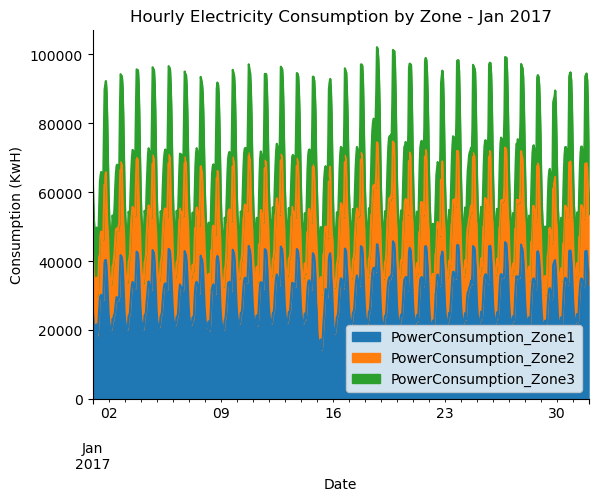

In [10]:
(consumption
 .set_index("Datetime")
 .resample("h")
 ["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]
 .mean()
 .loc["2017-01"]
 .plot
 .area(
     title="Hourly Electricity Consumption by Zone - Jan 2017",
     xlabel="Date",
     ylabel="Consumption (KwH)"
 )
)

import seaborn as sns 

sns.despine()

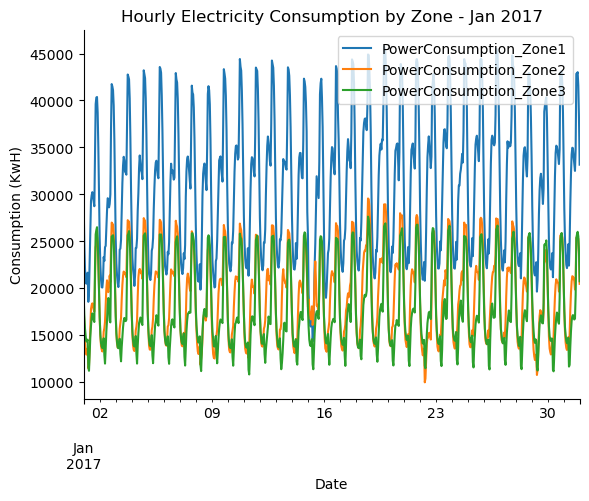

In [11]:
#alternatively as a line chart 

(consumption
 .set_index("Datetime")
 .resample("h")
 ["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]
 .mean()
 .loc["2017-01"]
 .plot
 (
     title="Hourly Electricity Consumption by Zone - Jan 2017",
     xlabel="Date",
     ylabel="Consumption (KwH)"
 )
)

import seaborn as sns 

sns.despine()

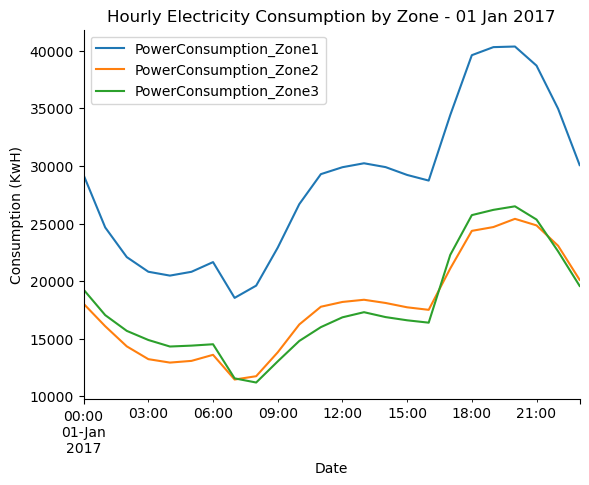

In [12]:
#alternatively as a day view (for ex. 01-01-2017) to get a better view/understanding 

(consumption
 .set_index("Datetime")
 .resample("h")
 ["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]
 .mean()
 .loc["2017-01-01"]
 .plot
 (
     title="Hourly Electricity Consumption by Zone - 01 Jan 2017",
     xlabel="Date",
     ylabel="Consumption (KwH)"
 )
)

import seaborn as sns 

sns.despine()

## Objective 3: Visualize Consumption Seasonality 
- Create a pivot table where rows are weekdays, columns are hours of day and cells represent avg value of `total_consumption`.
- Create a heatmap using the pivot table. Remove colorbar and use a non-default colormap. The heatmap should be sorted in order by day of week and hour of day. 
- Instead of integers representing day of week, use names of the day, while preserving logical sorting

In [13]:
consumption.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6


[Text(0.5, 1.0, 'Power Consumption by Day of Week and Hour')]

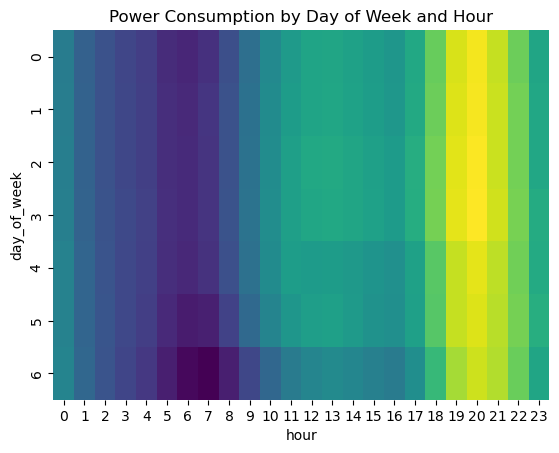

In [14]:
sns.heatmap(

consumption.pivot_table(
    index="day_of_week",
    columns="hour",
    values="total_consumption",
    aggfunc="mean"
  ),
    cbar=None, 
    cmap="viridis"
).set(title="Power Consumption by Day of Week and Hour")


In [15]:
day_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

consumption["day_name"]= pd.Categorical(consumption["Datetime"].dt.day_name(), categories=day_of_week)

[Text(0.5, 1.0, 'Power Consumption by Day of Week and Hour')]

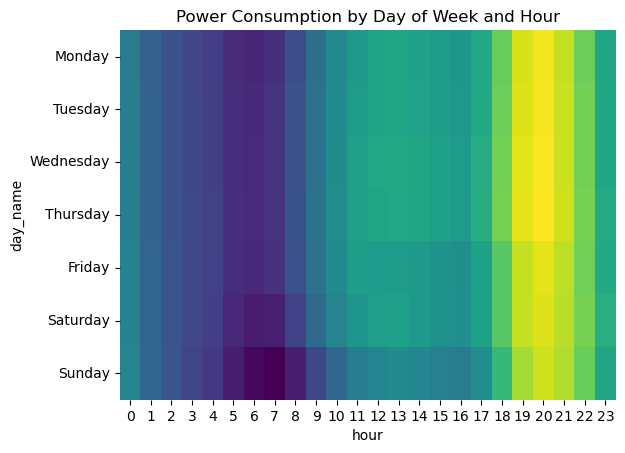

In [25]:
sns.heatmap(

consumption.pivot_table(
    index="day_name",
    columns="hour",
    values="total_consumption",
    aggfunc="mean",
    observed=False
  ),
    cbar=None, 
    cmap="viridis"
).set(title="Power Consumption by Day of Week and Hour")
